# BIKE SHARING SYSTEM

### Problem statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

##### The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA READING & UNDERSTANDING

In [5]:
df = pd.read_csv('D:/bike sharing/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## DATA CLEANING


In [5]:
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [6]:
df['weathersit'] = df['weathersit'].apply(lambda x:'Clear_weather' if x==1 else 'Cloudy' if x==2 else 'Light_rain_snow' if x==3
                                         else 'Heavy_rain_snow')

In [7]:
df['weathersit'].unique()

array(['Cloudy', 'Clear_weather', 'Light_rain_snow'], dtype=object)

In [8]:
#season (1:spring, 2:summer, 3:fall, 4:winter)
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
df['season'] = df['season'].apply(lambda x: 'Spring' if x==1 else 'Summer' if x==2 else 'fall' if x==3 else 'Winter')

In [10]:
df['season'].unique()

array(['Spring', 'Summer', 'fall', 'Winter'], dtype=object)

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear_weather,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear_weather,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear_weather,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# yr : year (0: 2018, 1:2019)
df['yr'].unique()

array([0, 1], dtype=int64)

In [13]:
df['yr'] = df['yr'].apply(lambda x:'Year_18' if x==0 else 'Year_19')

In [14]:
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
222,223,11-08-2018,fall,Year_18,8,0,4,1,Clear_weather,29.417500,32.57605,42.3750,11.041332,812,3980,4792
116,117,27-04-2018,Summer,Year_18,4,0,3,1,Cloudy,25.420000,28.75710,83.5417,20.917400,547,3325,3872
671,672,03-11-2019,Winter,Year_19,11,0,6,0,Cloudy,14.076653,16.19230,49.1250,18.125443,1029,4109,5138
724,725,26-12-2019,Spring,Year_19,12,0,3,1,Light_rain_snow,9.976653,11.01665,82.3333,21.208582,9,432,441
717,718,19-12-2019,Winter,Year_19,12,0,3,1,Clear_weather,13.632500,17.10810,62.5417,12.334164,333,4934,5267
385,386,21-01-2019,Spring,Year_19,1,0,6,0,Cloudy,7.106653,8.74375,83.1250,14.917014,67,1234,1301
364,365,31-12-2018,Spring,Year_18,12,0,6,0,Clear_weather,16.810000,20.70605,61.5833,14.750318,665,1820,2485
142,143,23-05-2018,Summer,Year_18,5,0,1,1,Cloudy,25.898347,29.51480,81.0000,15.667414,836,3438,4274
535,536,20-06-2019,Summer,Year_19,6,0,3,1,Clear_weather,32.082500,36.04875,59.2083,7.625404,872,5339,6211
292,293,20-10-2018,Winter,Year_18,10,0,4,1,Clear_weather,19.509153,23.32625,63.6250,28.292425,471,3724,4195


In [15]:
# Here lets drop instant as it is normal index column
# also drop dteday is the same information we have from yr,mnth,weekday
df = df.drop(['instant','dteday'],axis=1)
df.sample(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
486,Summer,Year_19,5,0,3,1,Clear_weather,23.130847,26.89480,79.7083,9.249886,667,5502,6169
451,Summer,Year_19,3,0,3,1,Clear_weather,19.850847,23.54750,48.1250,19.541957,674,5024,5698
265,Winter,Year_18,9,0,5,1,Cloudy,24.975847,26.10625,97.2500,5.250569,258,2137,2395
716,Winter,Year_19,12,0,2,1,Clear_weather,16.844153,20.48540,66.6250,14.834068,433,5124,5557
293,Winter,Year_18,10,0,5,1,Clear_weather,17.527500,21.17980,57.4167,14.833532,676,3628,4304
255,fall,Year_18,9,0,2,1,Clear_weather,26.684153,30.17770,71.2500,9.500868,701,4062,4763
391,Spring,Year_19,1,0,5,1,Cloudy,17.425000,20.76915,74.1250,22.958689,269,3187,3456
395,Spring,Year_19,1,0,2,1,Clear_weather,15.990000,19.06585,41.6667,17.541739,324,4185,4509
124,Summer,Year_18,5,0,4,1,Clear_weather,18.825847,22.09585,44.4167,19.791264,614,3819,4433
622,fall,Year_19,9,0,6,0,Clear_weather,24.941653,29.29335,50.1667,16.583907,3160,5554,8714


In [16]:
# Checking Null values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
df.shape

(730, 14)

In [18]:
df.describe()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [19]:
df.describe(include='object')

,season,yr,weathersit
count,730,730,730
unique,4,2,3
top,fall,Year_18,Clear_weather
freq,188,365,463


In [20]:
df.groupby('yr')['cnt'].mean()

yr
Year_18    3405.761644
Year_19    5610.252055
Name: cnt, dtype: float64

In [21]:
df.groupby('season')['cnt'].mean()

season
Spring    2608.411111
Summer    4992.331522
Winter    4728.162921
fall      5644.303191
Name: cnt, dtype: float64

In [22]:
df.groupby('weathersit')['cnt'].mean()

weathersit
Clear_weather      4876.786177
Cloudy             4044.813008
Light_rain_snow    1803.285714
Name: cnt, dtype: float64

In [23]:
df['holiday'].value_counts()/len(df.index)

0    0.971233
1    0.028767
Name: holiday, dtype: float64

In [24]:
df.groupby('holiday')['cnt'].mean()

holiday
0    4530.90268
1    3735.00000
Name: cnt, dtype: float64

In [25]:
df.groupby('workingday')['cnt'].mean()

workingday
0    4330.168831
1    4590.332665
Name: cnt, dtype: float64

- We can drop 'workingday' as it is showing constant behaviour with 'cnt' independent column

In [26]:
df['workingday'].value_counts()/len(df.index)

1    0.683562
0    0.316438
Name: workingday, dtype: float64

In [27]:
df['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [28]:
df[['workingday','holiday']].corr()

,workingday,holiday
workingday,1.000000,-0.252948
holiday,-0.252948,1.000000


# Perform univariate analysis of continious data

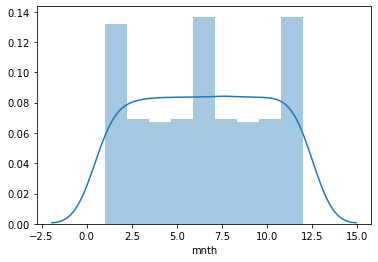

In [29]:
sns.distplot(df['mnth']);

In [30]:
df['mnth'] = df['mnth'].astype('object')

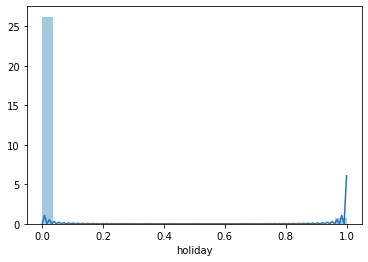

In [31]:
sns.distplot(df['holiday']);

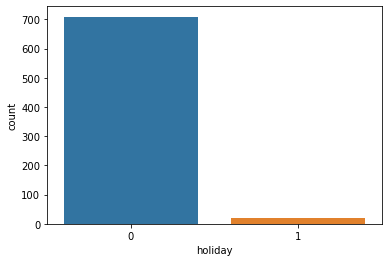

In [32]:
sns.countplot(df['holiday']);

In [33]:
# As It is actually a categorical values but pandas read it as continious so converting
df['holiday'] = df['holiday'].astype('object')

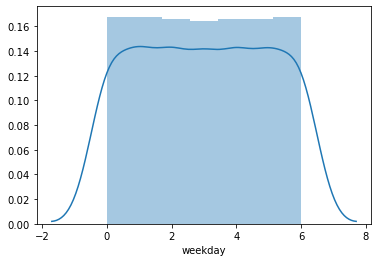

In [34]:
sns.distplot(df['weekday']);

In [35]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

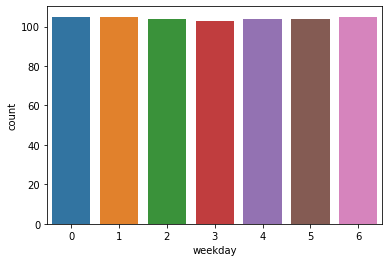

In [36]:
sns.countplot(df['weekday']);

- We can drop this column as it is not showing different behaviour with rows

In [37]:
df['weekday'] = df['weekday'].astype('object')

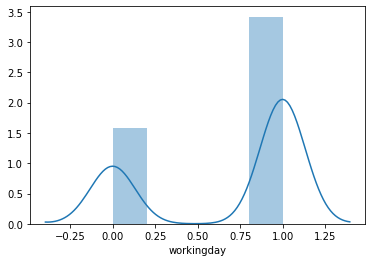

In [38]:
sns.distplot(df['workingday']);

In [39]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

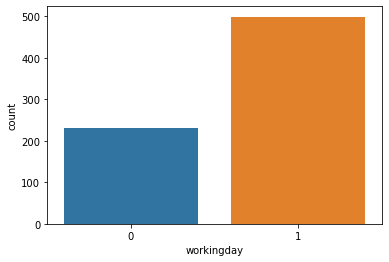

In [40]:
sns.countplot(df['workingday']);

In [41]:
# As It is actually a categorical values but pandas read it as continious so converting
df['workingday'] = df['workingday'].astype('object')

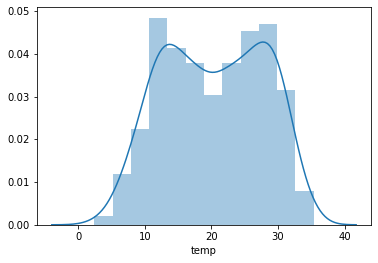

In [42]:
sns.distplot(df['temp']);

- This could be important feature having higher co-relation with dependent feature 'cnt' =  62%

In [43]:
df[['temp','cnt']].corr()

,temp,cnt
temp,1.000000,0.627044
cnt,0.627044,1.000000


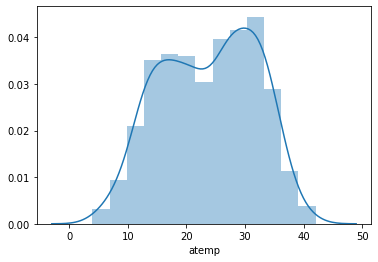

In [44]:
sns.distplot(df['atemp']);

- This could be also the important feature having highly co-related with target variable---63%

In [45]:
df[['atemp','cnt']].corr()

,atemp,cnt
atemp,1.000000,0.630685
cnt,0.630685,1.000000


- Now let's check multicolinearity between temp and atemp beacuse they are showing same corelation with target
- but we will not drop this feature if it is highly multico-linear let's the model and vif decide

In [46]:
df[['atemp','temp']].corr()

,atemp,temp
atemp,1.000000,0.991696
temp,0.991696,1.000000


- yes atemp and temp are highly multicolinear almost same information explained by both features

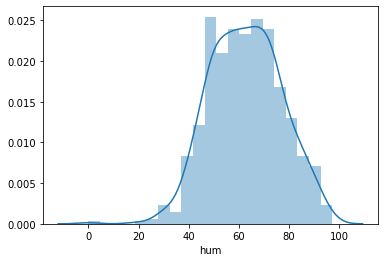

In [47]:
sns.distplot(df['hum']);

In [48]:
df[['hum','cnt']].corr()

,hum,cnt
hum,1.000000,-0.098543
cnt,-0.098543,1.000000


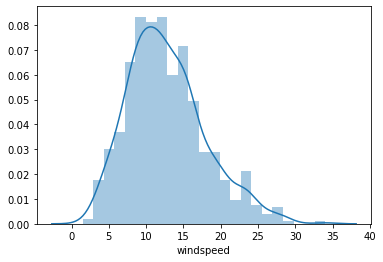

In [49]:
sns.distplot(df['windspeed']);

In [50]:
df[['windspeed','cnt']].corr()

,windspeed,cnt
windspeed,1.000000,-0.235132
cnt,-0.235132,1.000000


- somehow we can consider this feature also beacuse its 25% correelated with cnt

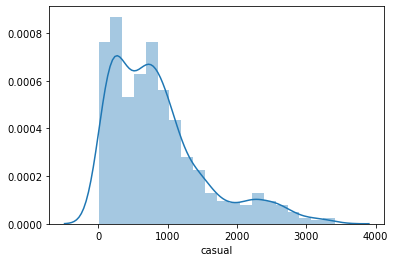

In [51]:
sns.distplot(df['casual']);

In [52]:
df[['casual','cnt']].corr()

,casual,cnt
casual,1.000000,0.672123
cnt,0.672123,1.000000


- Highly co-related with dependent

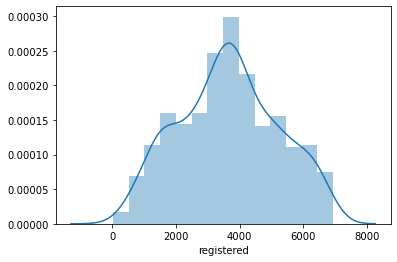

In [53]:
sns.distplot(df['registered']);

In [54]:
df[['registered','cnt']].corr()

,registered,cnt
registered,1.000000,0.945411
cnt,0.945411,1.000000


- it is also highly co-related with cnt

## Let's check multi-colinearity between registred and casual

In [55]:
df[['registered','casual']].corr()

,registered,casual
registered,1.000000,0.394137
casual,0.394137,1.000000


- 40% multi-colinear and as we know cnt is sum of casula and registered so we can drop but let the model decide

## Check distribution of target variable

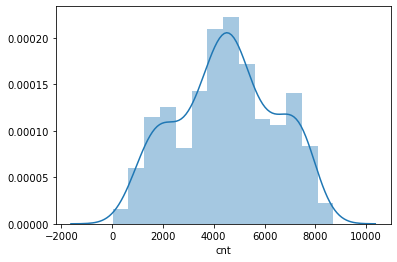

In [56]:
sns.distplot(df['cnt']);

In [57]:
# its normally distributed no outliers
df['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

# univariate of descrete features

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


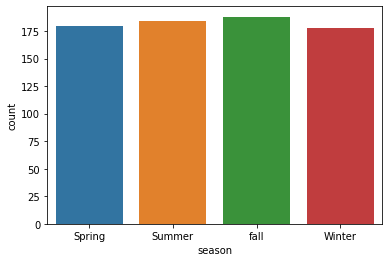

In [59]:
sns.countplot(df['season']);

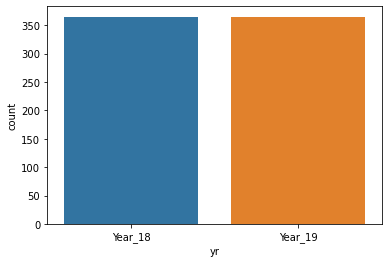

In [60]:
sns.countplot(df['yr']);

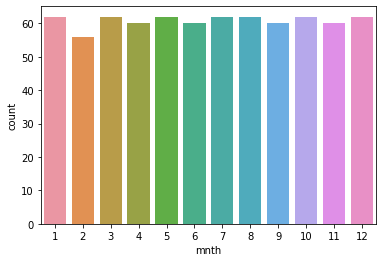

In [61]:
sns.countplot(df['mnth']);

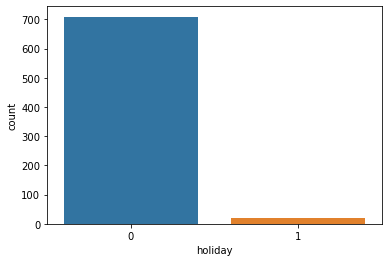

In [62]:
sns.countplot(df['holiday']);

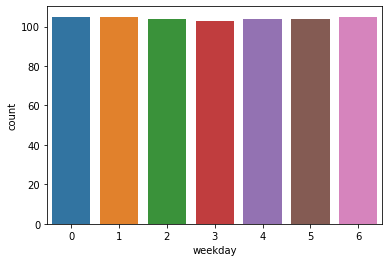

In [63]:
sns.countplot(df['weekday']);

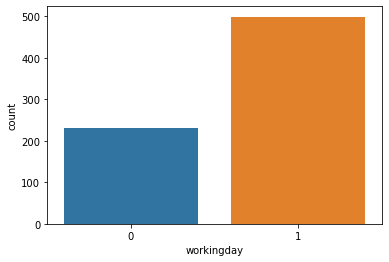

In [64]:
sns.countplot(df['workingday']);

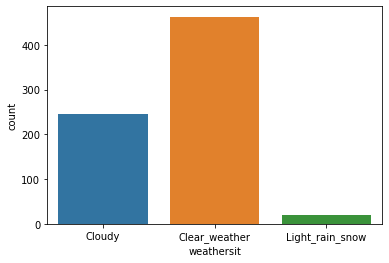

In [65]:
sns.countplot(df['weathersit']);

# Bi-variate analysis with dependent variable 'cnt'

### Bi-variate with target(continious) with independent continious features

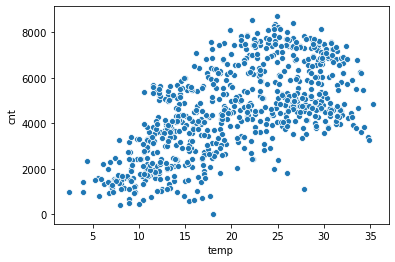

In [66]:
sns.scatterplot(df['temp'],df['cnt']);

- temp looks linear co-related with 'cnt' key feature for prediction 

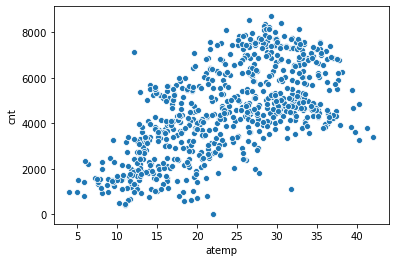

In [67]:
sns.scatterplot(df['atemp'],df['cnt']);

- looks as it could be the key feature

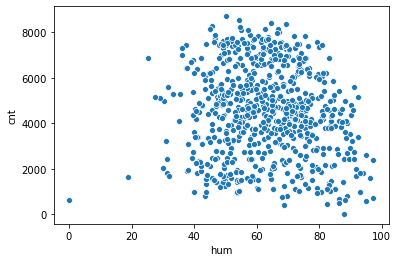

In [68]:
sns.scatterplot(df['hum'],df['cnt']);

- it is also depending but not that much important

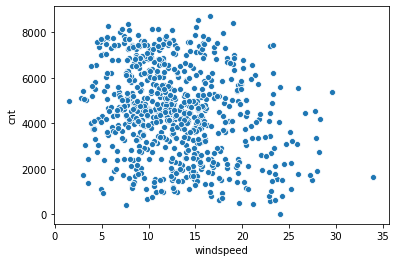

In [69]:
sns.scatterplot(df['windspeed'],df['cnt']);

- it's not looking more linear then temp and atemp

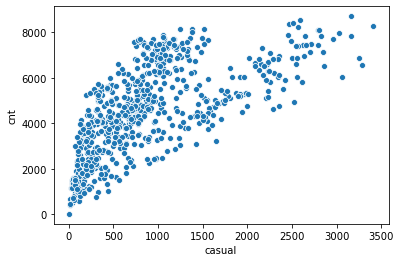

In [70]:
sns.scatterplot(df['casual'],df['cnt']);

- it looks highly linear with cnt could be the key feature

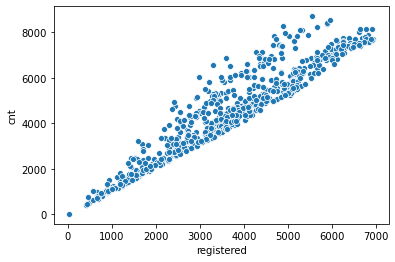

In [71]:
sns.scatterplot(df['registered'],df['cnt']);

- this is also linear with high slope consider as a key feature in model building
- but as it is included in y so we cannot take it as key features

## Bi-variate with continous and catgorical

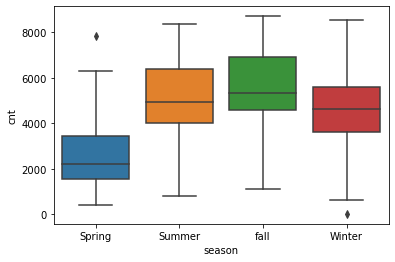

In [72]:
sns.boxplot(df['season'],df['cnt']);

- In summer and fall season CNT is higher and its varying from very low to high value

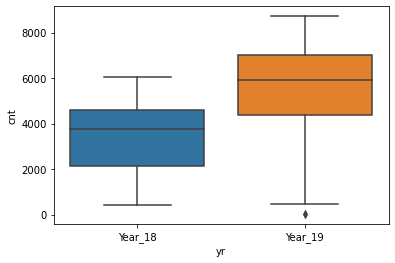

In [73]:
sns.boxplot(df['yr'],df['cnt']);

- 'cnt' is higher in 2019 year means users are increasing by year

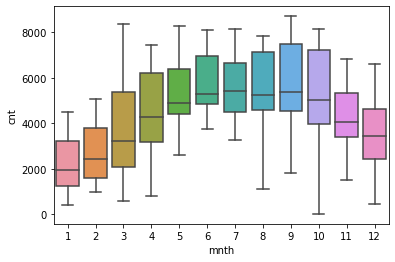

In [74]:
sns.boxplot(df['mnth'],df['cnt']);

- here we can see more users registerd them self in may to october month
- but its more in 2019 year month from below groupby we can easilt understand

In [75]:
df.groupby(['yr','mnth'])['cnt'].mean()

yr       mnth
Year_18  1       1231.903226
         2       1721.964286
         3       2065.967742
         4       3162.333333
         5       4381.322581
         6       4783.733333
         7       4559.387097
         8       4409.387097
         9       4247.266667
         10      3984.225806
         11      3405.566667
         12      2816.870968
Year_19  1       3120.774194
         2       3617.964286
         3       5318.548387
         4       5807.466667
         5       6318.225806
         6       6761.000000
         7       6567.967742
         8       6919.451613
         9       7285.766667
         10      6414.225806
         11      5088.800000
         12      3990.741935
Name: cnt, dtype: float64

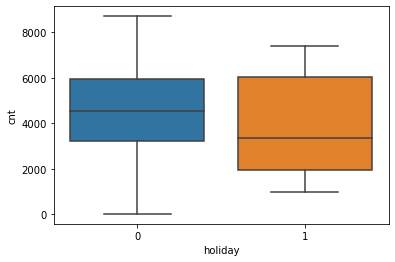

In [76]:
sns.boxplot(df['holiday'],df['cnt']);

- holiday is also showing little bit impact on 'cnt'

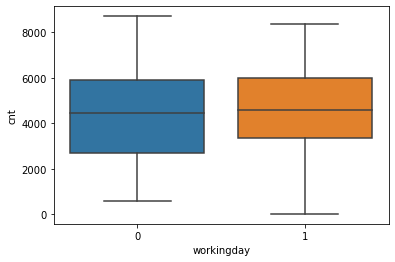

In [77]:
sns.boxplot(df['workingday'],df['cnt']);

In [78]:
df.groupby('workingday')['cnt'].mean()

workingday
0    4330.168831
1    4590.332665
Name: cnt, dtype: float64

- working day is not imposing any impact on 'cnt' so we can drop this feature but we will make this out from  model

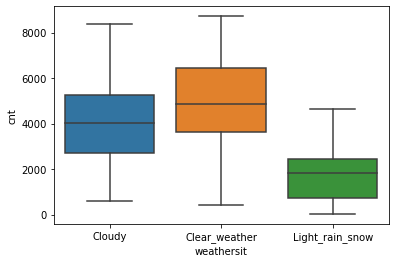

In [79]:
sns.boxplot(df['weathersit'],df['cnt']);

In [80]:
df.groupby('weathersit')['cnt'].mean()

weathersit
Clear_weather      4876.786177
Cloudy             4044.813008
Light_rain_snow    1803.285714
Name: cnt, dtype: float64

- Yes weathersit is good imapct on 'cnt'
- we can understand like that definately if weather will be clear more users will use the bike
- but in cloudy people wont prefer alot and in rainy very few will prefer

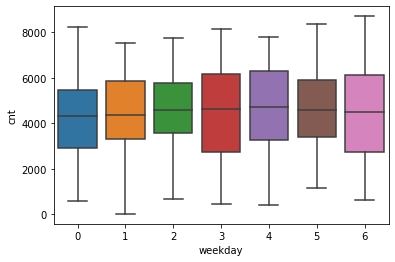

In [94]:
sns.boxplot(df['weekday'],df['cnt'])

- On weekday its not depending so we can drop this as well

In [95]:
df = df.drop('weekday',axis=1)

# Perform multivariate analysis

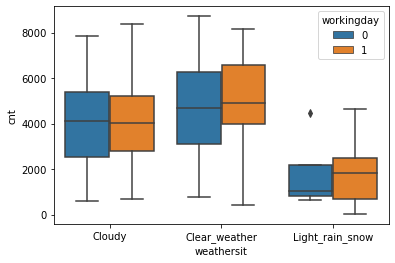

In [81]:
sns.boxplot(x=df['weathersit'],y=df['cnt'],hue=df['workingday']);

- when weather situation is light_rain cnt will be less inspite of workingday or not

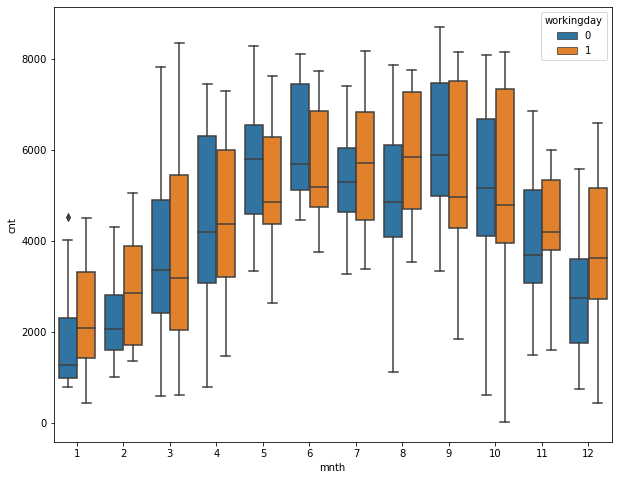

In [82]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['mnth'],y=df['cnt'],hue=df['workingday']);

- more counts are from may to october

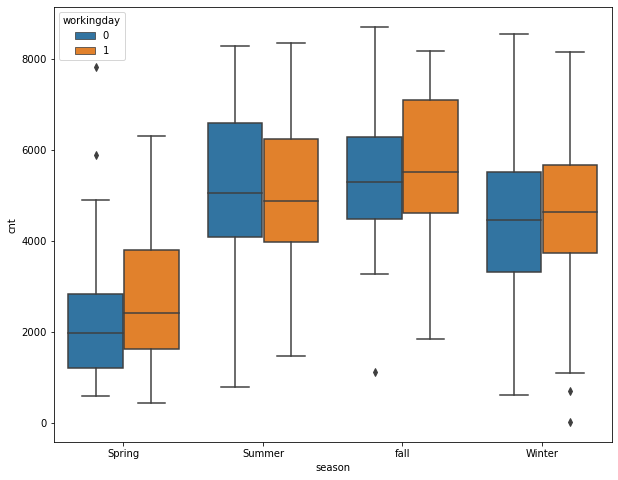

In [83]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['season'],y=df['cnt'],hue=df['workingday']);

- In fall and summer season counts are mor then in winter but very less in Spring

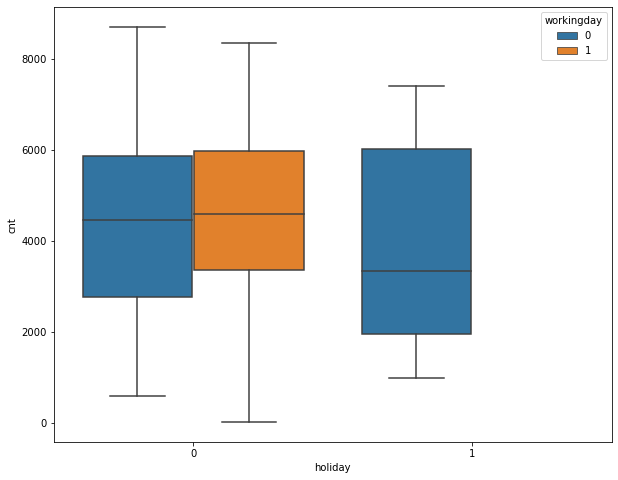

In [84]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['holiday'],y=df['cnt'],hue=df['workingday']);

- when holiday is there then there is no count of workingday
- no difference when no holiday and no working day with no holiday and working day

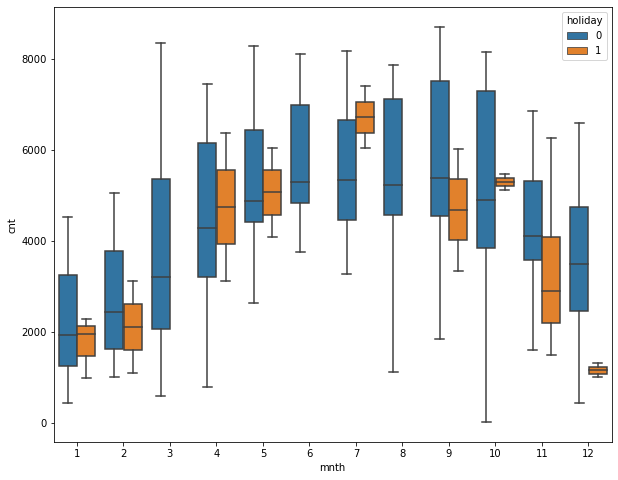

In [85]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['mnth'],y=df['cnt'],hue=df['holiday']);

In [86]:
df = df.drop(['casual','registered'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,Year_18,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,Year_18,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,Year_18,1,0,1,1,Clear_weather,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,Year_18,1,0,2,1,Clear_weather,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,Year_18,1,0,3,1,Clear_weather,9.305237,11.46350,43.6957,12.522300,1600


# Data Preparation

- Most important and crucial part of project
- here we will handle all object data types and continous data type

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   workingday  730 non-null    object 
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 62.9+ KB


In [97]:
df.head(8)

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,Year_18,1,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,Year_18,1,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,Year_18,1,0,1,Clear_weather,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,Year_18,1,0,1,Clear_weather,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,Year_18,1,0,1,Clear_weather,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,Year_18,1,0,1,Clear_weather,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,Year_18,1,0,1,Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,Year_18,1,0,0,Cloudy,6.765000,8.11270,53.5833,17.875868,959


## Create dumiies of categorical features

In [98]:
df_cat  = df.select_dtypes('object')
df_cont = df.select_dtypes(['int64','float64'])

In [99]:
df_cat.head()

,season,yr,mnth,holiday,workingday,weathersit
0,Spring,Year_18,1,0,0,Cloudy
1,Spring,Year_18,1,0,0,Cloudy
2,Spring,Year_18,1,0,1,Clear_weather
3,Spring,Year_18,1,0,1,Clear_weather
4,Spring,Year_18,1,0,1,Clear_weather


In [100]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [101]:
dummies_df = pd.get_dummies(df_cat,drop_first=True)
dummies_df.head()

,season_Summer,season_Winter,season_fall,yr_Year_19,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,workingday_1,weathersit_Cloudy,weathersit_Light_rain_snow
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [102]:
df = df.drop(df_cat.columns,axis=1)
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [103]:
df_final = pd.concat([df,dummies_df],axis=1)
df_final.head()

,temp,atemp,hum,windspeed,cnt,season_Summer,season_Winter,season_fall,yr_Year_19,mnth_2,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,workingday_1,weathersit_Cloudy,weathersit_Light_rain_snow
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [104]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        730 non-null    float64
 1   atemp                       730 non-null    float64
 2   hum                         730 non-null    float64
 3   windspeed                   730 non-null    float64
 4   cnt                         730 non-null    int64  
 5   season_Summer               730 non-null    uint8  
 6   season_Winter               730 non-null    uint8  
 7   season_fall                 730 non-null    uint8  
 8   yr_Year_19                  730 non-null    uint8  
 9   mnth_2                      730 non-null    uint8  
 10  mnth_3                      730 non-null    uint8  
 11  mnth_4                      730 non-null    uint8  
 12  mnth_5                      730 non-null    uint8  
 13  mnth_6                      730 non

In [105]:
df_final.shape

(730, 24)

# Model building

## Split data in train test in 70 , 30 ratio

In [106]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df_final.drop('cnt', axis=1)

X.head()

,temp,atemp,hum,windspeed,season_Summer,season_Winter,season_fall,yr_Year_19,mnth_2,mnth_3,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,workingday_1,weathersit_Cloudy,weathersit_Light_rain_snow
0,14.110847,18.18125,80.5833,10.749882,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [107]:
# Putting response variable to y
y = df_final['cnt']

y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [108]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [109]:
X_train.head()

,temp,atemp,hum,windspeed,season_Summer,season_Winter,season_fall,yr_Year_19,mnth_2,mnth_3,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,workingday_1,weathersit_Cloudy,weathersit_Light_rain_snow
653,19.201653,23.0423,55.8333,12.208807,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
576,29.246653,33.1448,70.4167,11.083475,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
426,16.980847,20.6746,62.1250,10.792293,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
728,10.489153,11.5850,48.3333,23.500518,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
482,15.443347,18.8752,48.9583,8.708325,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Scaling the features and make sure scaling should done after splitiing

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['temp','atemp','hum','windspeed']] = scaler.fit_transform(X_train[['temp','atemp','hum','windspeed']])

X_train.head()

,temp,atemp,hum,windspeed,season_Summer,season_Winter,season_fall,yr_Year_19,mnth_2,mnth_3,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,workingday_1,weathersit_Cloudy,weathersit_Light_rain_snow
653,-0.121335,-0.055878,-0.514725,-0.117752,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
576,1.231731,1.194106,0.516433,-0.330615,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
426,-0.420478,-0.348834,-0.069854,-0.385694,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
728,-1.294913,-1.473492,-1.045032,2.018143,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
482,-0.627580,-0.571474,-1.000840,-0.779889,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [112]:
X_test[['temp','atemp','hum','windspeed']] = scaler.transform(X_test[['temp','atemp','hum','windspeed']])
X_test.head()

,temp,atemp,hum,windspeed,season_Summer,season_Winter,season_fall,yr_Year_19,mnth_2,mnth_3,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,workingday_1,weathersit_Cloudy,weathersit_Light_rain_snow
184,1.305371,1.209703,0.047995,-1.394498,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
535,1.613721,1.553413,-0.276087,-0.984730,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,-0.112129,-0.079386,1.285378,0.079219,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
221,1.526280,1.330748,-1.463381,0.110839,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
152,1.240938,1.076847,-2.305983,1.277165,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


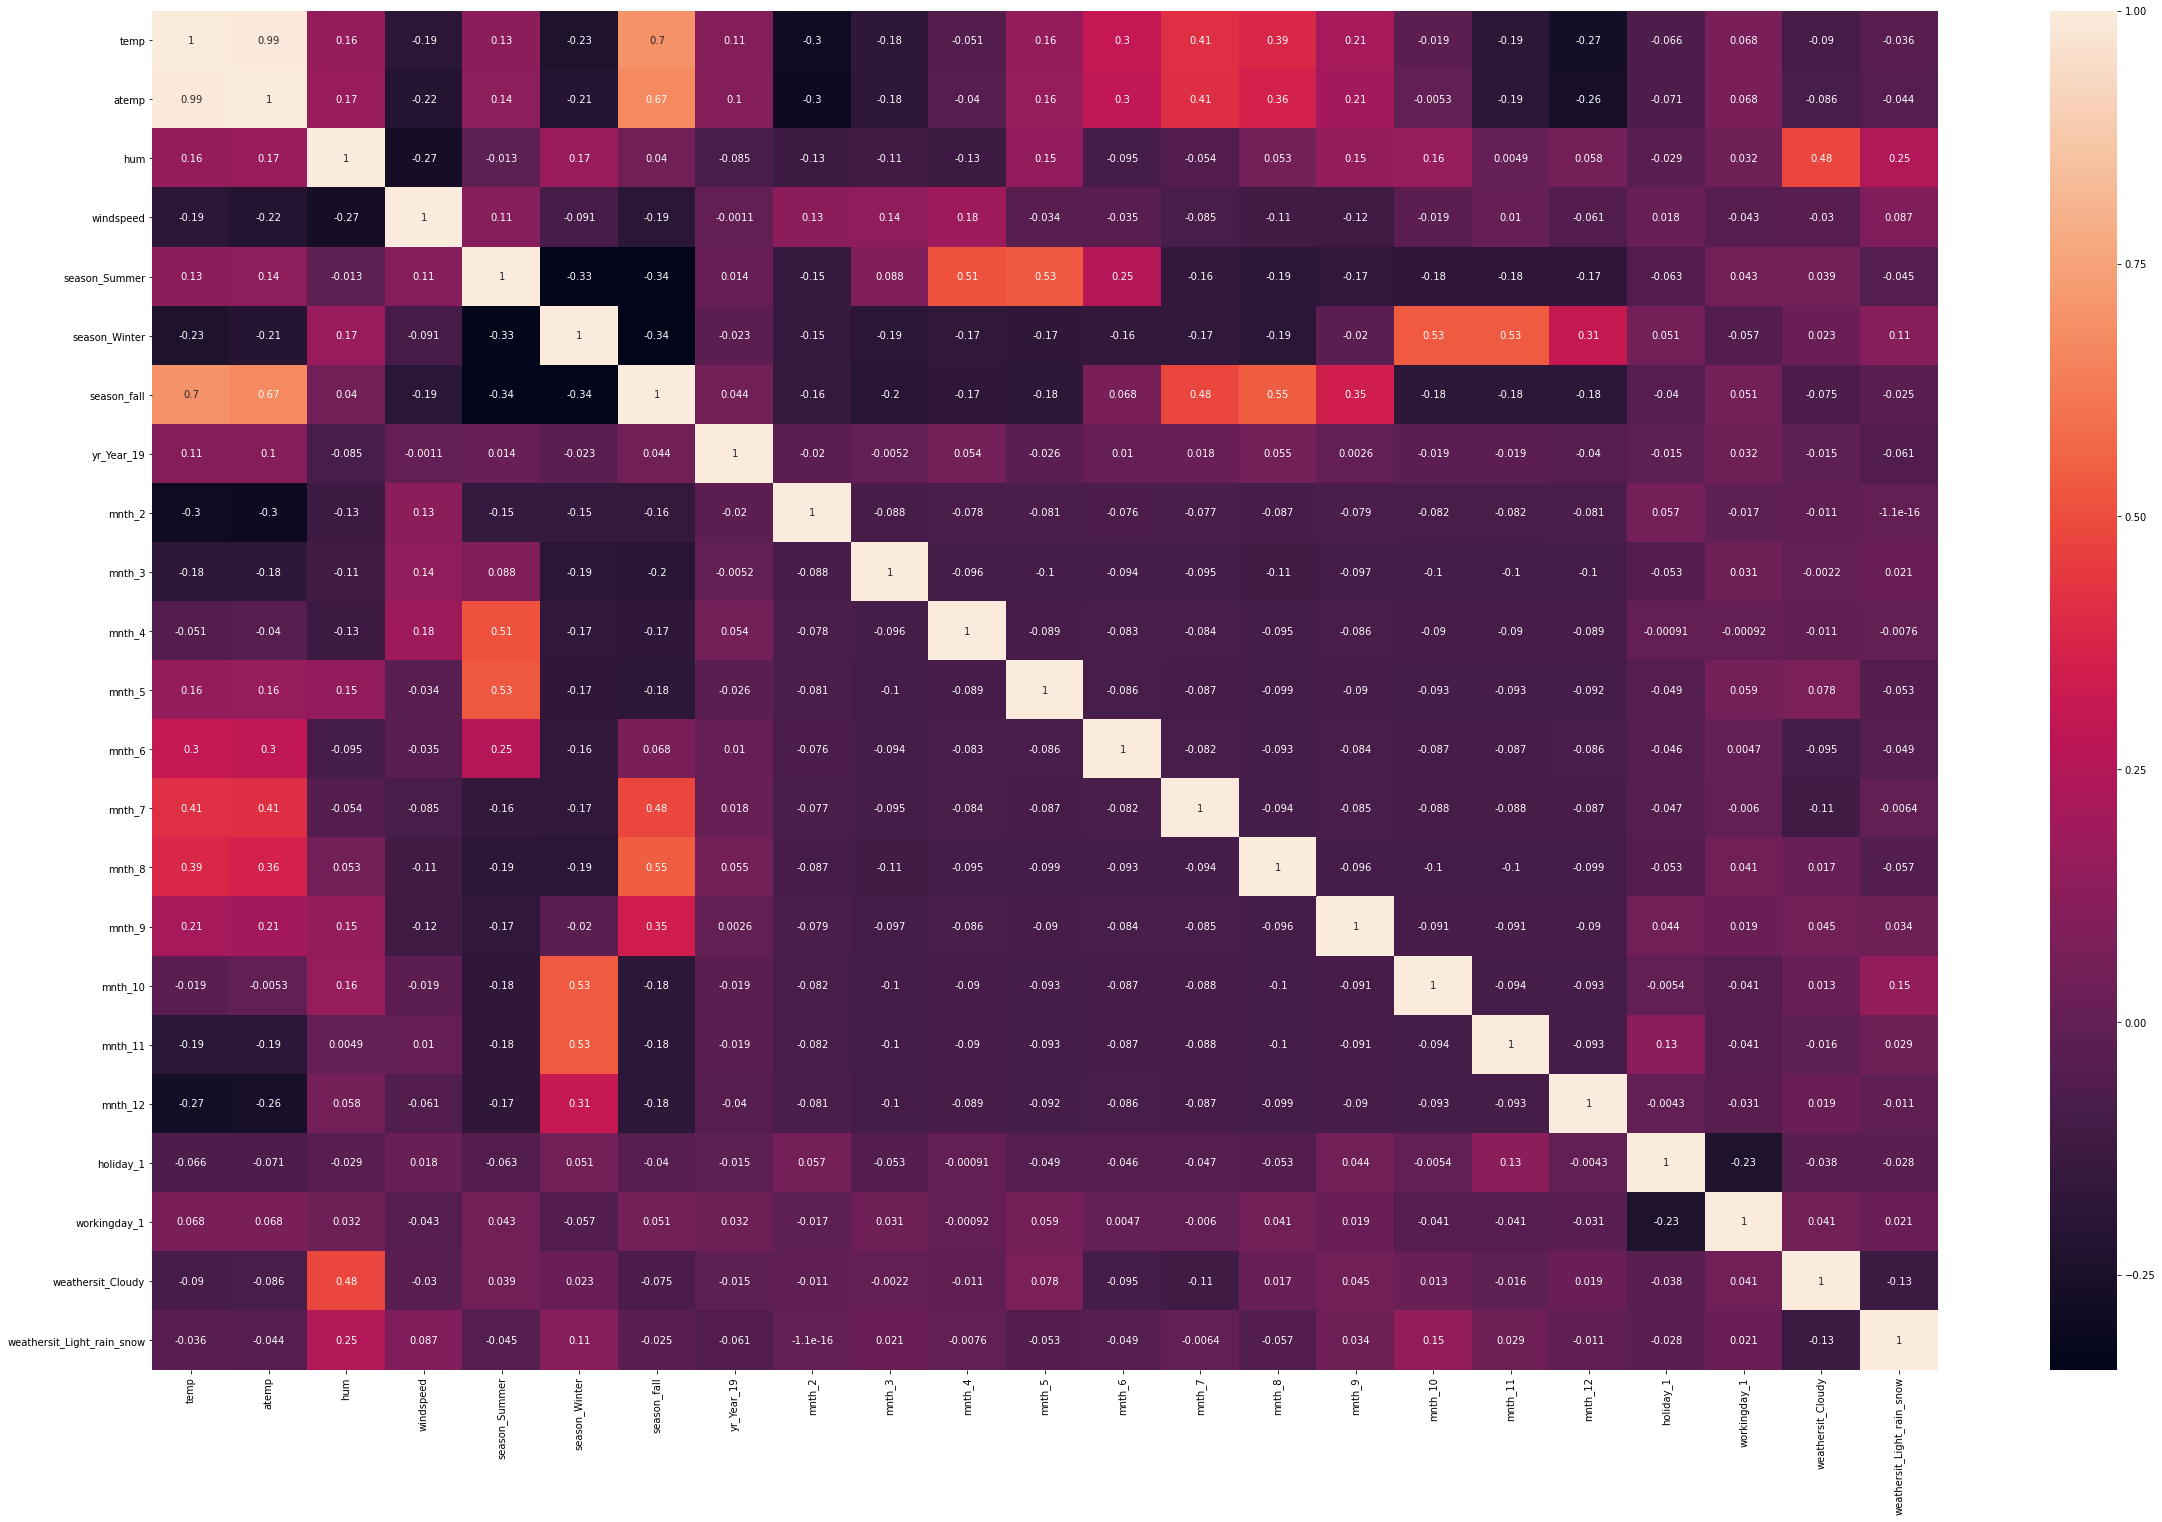

In [113]:
## Now looking at highly corelated features
plt.figure(figsize=(40,25))
sns.heatmap(X_train.corr(),annot=True);

In [114]:
import statsmodels.api as sm
# Add a constant
X_train_cons = sm.add_constant(X_train)

X_train_cons.head()

,const,temp,atemp,hum,windspeed,season_Summer,season_Winter,season_fall,yr_Year_19,mnth_2,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,workingday_1,weathersit_Cloudy,weathersit_Light_rain_snow
653,1.0,-0.121335,-0.055878,-0.514725,-0.117752,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
576,1.0,1.231731,1.194106,0.516433,-0.330615,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
426,1.0,-0.420478,-0.348834,-0.069854,-0.385694,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
728,1.0,-1.294913,-1.473492,-1.045032,2.018143,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
482,1.0,-0.627580,-0.571474,-1.000840,-0.779889,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        510 non-null    float64
 1   atemp                       510 non-null    float64
 2   hum                         510 non-null    float64
 3   windspeed                   510 non-null    float64
 4   season_Summer               510 non-null    uint8  
 5   season_Winter               510 non-null    uint8  
 6   season_fall                 510 non-null    uint8  
 7   yr_Year_19                  510 non-null    uint8  
 8   mnth_2                      510 non-null    uint8  
 9   mnth_3                      510 non-null    uint8  
 10  mnth_4                      510 non-null    uint8  
 11  mnth_5                      510 non-null    uint8  
 12  mnth_6                      510 non-null    uint8  
 13  mnth_7                      510 no

In [116]:
# Create a first fitted model
lr = sm.OLS(y_train, X_train_cons).fit()

In [117]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.1
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          2.36e-182
Time:                        13:29:32   Log-Likelihood:                -4106.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     486   BIC:                             8363.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2532.6701    190.737     13.278      0.000    2157.899    2907.441
temp                         835.8030    280.510      2.980      0.003     284.642    1386.964
atemp                         54.6906    256.455      0.213      0.831    -449.207     558.588
hum                         -211.5625     49.109     -4.308      0.000    -308.055    -115.070
windspeed                   -272.8063     39.250     -6.950      0.000    -349.928    -195.685
season_Summer                756.6810    207.415      3.648      0.000     349.140    1164.222
season_Winter               1322.1000    227.860      5.802      0.000     874.387    1769.813
season_fall                  392.7221    263.732      1.489      0.137    -125.473     910.917
yr_Year_19                  2005.5467     70.757     28.344      0.000    1866.520    2144.574
mnth_2                       231.7360    180.851      1.281      0.201    -123.610     587.082
mnth_3                       552.0648    196.623      2.808      0.005     165.729     938.401
mnth_4                       513.7269    294.919      1.742      0.082     -65.746    1093.200
mnth_5                       728.7143    317.958      2.292      0.022     103.972    1353.456
mnth_6                       509.6066    343.628      1.483      0.139    -165.574    1184.787
mnth_7                       190.0712    387.020      0.491      0.624    -570.367     950.510
mnth_8                       701.6909    369.114      1.901      0.058     -23.566    1426.947
mnth_9                      1275.6075    329.548      3.871      0.000     628.092    1923.123
mnth_10                      593.5682    302.719      1.961      0.050      -1.231    1188.367
mnth_11                      175.7226    288.467      0.609      0.543    -391.073     742.519
mnth_12                      169.8886    232.886      0.729      0.466    -287.700     627.477
holiday_1                   -668.2839    230.281     -2.902      0.004   -1120.753    -215.815
workingday_1                 137.5050     76.477      1.798      0.073     -12.762     287.772
weathersit_Cloudy           -494.5557     91.236     -5.421      0.000    -673.822    -315.289
weathersit_Light_rain_snow -2156.3267    230.801     -9.343      0.000   -2609.817   -1702.837
==============================================================================
Omnibus:                       70.667   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.395
Skew:                          -0.663   Prob(JB):                     6.81e-45
Kurtosis:                       5.795   Cond. No.                         38.6
==============================================================================

Warnings:
[1] Standard Errors assume that t

- It looks like overfitted

### We can check multicolinearity also

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,60.88
1,atemp,55.14
6,season_fall,15.31
5,season_Winter,10.88
4,season_Summer,8.87
14,mnth_8,7.20
13,mnth_7,6.02
17,mnth_11,5.06
15,mnth_9,4.97
16,mnth_10,4.94


### Highly multicolinear features are there lets use RFE instead of going one by one to save the time

# Here Number of features are very high so we can use RFE 

In [119]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [120]:
from sklearn.feature_selection import RFE
rfe = RFE(linreg, 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [121]:
rfe.support_

array([ True, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True])

In [122]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 12),
 ('hum', False, 6),
 ('windspeed', False, 5),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('season_fall', True, 1),
 ('yr_Year_19', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 3),
 ('mnth_7', False, 10),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 8),
 ('holiday_1', True, 1),
 ('workingday_1', False, 11),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light_rain_snow', True, 1)]

In [123]:
# selected top 10 features in models
col = X_train.columns[rfe.support_]
col

Index(['temp', 'season_Summer', 'season_Winter', 'season_fall', 'yr_Year_19',
       'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1',
       'weathersit_Cloudy', 'weathersit_Light_rain_snow'],
      dtype='object')

In [124]:
# not selected features in model
X_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'windspeed', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_11', 'mnth_12', 'workingday_1'],
      dtype='object')

In [125]:
X_train_cons = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_cons).fit()

In [126]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          4.76e-180
Time:                        13:30:08   Log-Likelihood:                -4141.1
No. Observations:                 510   AIC:                             8308.
Df Residuals:                     497   BIC:                             8363.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2894.2750    120.764     23.966      0.000    2657.005    3131.545
temp                         928.0820     68.135     13.621      0.000     794.214    1061.951
season_Summer               1076.7368    137.819      7.813      0.000     805.958    1347.516
season_Winter               1369.9056    127.827     10.717      0.000    1118.757    1621.054
season_fall                  504.0382    205.399      2.454      0.014     100.481     907.595
yr_Year_19                  2023.0581     73.726     27.440      0.000    1878.205    2167.911
mnth_3                       232.1095    132.199      1.756      0.080     -27.628     491.847
mnth_8                       406.4246    159.986      2.540      0.011      92.092     720.757
mnth_9                      1001.6445    157.102      6.376      0.000     692.979    1310.310
mnth_10                      309.0115    159.893      1.933      0.054      -5.139     623.162
holiday_1                   -820.5974    233.818     -3.510      0.000   -1279.991    -361.204
weathersit_Cloudy           -706.0602     78.786     -8.962      0.000    -860.856    -551.265
weathersit_Light_rain_snow -2670.9623    222.210    -12.020      0.000   -3107.549   -2234.375
==============================================================================
Omnibus:                       78.941   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.558
Skew:                          -0.779   Prob(JB):                     1.04e-44
Kurtosis:                       5.665   Cond. No.                         9.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_cons.columns
vif['VIF'] = [variance_inflation_factor(X_train_cons.values, i) for i in range(X_train_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.96
4,season_fall,6.14
1,temp,3.49
2,season_Summer,2.64
3,season_Winter,2.30
7,mnth_8,1.67
9,mnth_10,1.52
8,mnth_9,1.37
6,mnth_3,1.16
12,weathersit_Light_rain_snow,1.06


# Lot of high p value and high vif so build model with 12 features usinf rfe

In [128]:
col = col.drop('mnth_3')
col

Index(['temp', 'season_Summer', 'season_Winter', 'season_fall', 'yr_Year_19',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weathersit_Cloudy',
       'weathersit_Light_rain_snow'],
      dtype='object')

In [129]:
X_train_cons = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.6
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          1.47e-180
Time:                        13:31:13   Log-Likelihood:                -4142.7
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     498   BIC:                             8360.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2960.3833    114.984     25.746      0.000    2734.470    3186.296
temp                         932.9320     68.221     13.675      0.000     798.895    1066.969
season_Summer               1043.1764    136.772      7.627      0.000     774.456    1311.897
season_Winter               1307.3666    123.021     10.627      0.000    1065.663    1549.070
season_fall                  431.9067    201.669      2.142      0.033      35.681     828.133
yr_Year_19                  2023.4667     73.880     27.389      0.000    1878.312    2168.621
mnth_8                       406.9365    160.320      2.538      0.011      91.949     721.924
mnth_9                      1002.8377    157.429      6.370      0.000     693.532    1312.144
mnth_10                      304.4281    160.206      1.900      0.058     -10.335     619.191
holiday_1                   -846.6948    233.833     -3.621      0.000   -1306.115    -387.275
weathersit_Cloudy           -707.4059     78.947     -8.960      0.000    -862.516    -552.295
weathersit_Light_rain_snow -2651.6294    222.401    -11.923      0.000   -3088.589   -2214.670
==============================================================================
Omnibus:                       77.470   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.739
Skew:                          -0.746   Prob(JB):                     1.73e-46
Kurtosis:                       5.773   Cond. No.                         9.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train_cons.columns
vif['VIF'] = [variance_inflation_factor(X_train_cons.values, i) for i in range(X_train_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.90
4,season_fall,5.90
1,temp,3.48
2,season_Summer,2.59
3,season_Winter,2.12
6,mnth_8,1.67
8,mnth_10,1.51
7,mnth_9,1.37
11,weathersit_Light_rain_snow,1.06
10,weathersit_Cloudy,1.05


In [131]:
col = col.drop('mnth_10')
col

Index(['temp', 'season_Summer', 'season_Winter', 'season_fall', 'yr_Year_19',
       'mnth_8', 'mnth_9', 'holiday_1', 'weathersit_Cloudy',
       'weathersit_Light_rain_snow'],
      dtype='object')

In [132]:
X_train_cons = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          5.63e-181
Time:                        13:31:44   Log-Likelihood:                -4144.5
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     499   BIC:                             8358.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2991.0997    114.139     26.206      0.000    2766.847    3215.353
temp                         962.6029     66.584     14.457      0.000     831.783    1093.422
season_Summer               1004.5627    135.607      7.408      0.000     738.131    1270.994
season_Winter               1392.8224    114.805     12.132      0.000    1167.261    1618.384
season_fall                  377.0669    200.114      1.884      0.060     -16.104     770.237
yr_Year_19                  2019.6893     74.046     27.276      0.000    1874.209    2165.169
mnth_8                       395.5208    160.626      2.462      0.014      79.934     711.107
mnth_9                       972.4441    157.023      6.193      0.000     663.936    1280.952
holiday_1                   -858.4534    234.361     -3.663      0.000   -1318.910    -397.997
weathersit_Cloudy           -700.5655     79.071     -8.860      0.000    -855.919    -545.212
weathersit_Light_rain_snow -2598.8663    221.237    -11.747      0.000   -3033.537   -2164.195
==============================================================================
Omnibus:                       67.800   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.000
Skew:                          -0.680   Prob(JB):                     1.22e-37
Kurtosis:                       5.479   Cond. No.                         9.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
vif = pd.DataFrame()
vif['Features'] = X_train_cons.columns
vif['VIF'] = [variance_inflation_factor(X_train_cons.values, i) for i in range(X_train_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.70
4,season_fall,5.78
1,temp,3.30
2,season_Summer,2.53
3,season_Winter,1.84
6,mnth_8,1.67
7,mnth_9,1.36
9,weathersit_Cloudy,1.05
10,weathersit_Light_rain_snow,1.04
5,yr_Year_19,1.02


In [134]:
col = col.drop('season_fall')
col

Index(['temp', 'season_Summer', 'season_Winter', 'yr_Year_19', 'mnth_8',
       'mnth_9', 'holiday_1', 'weathersit_Cloudy',
       'weathersit_Light_rain_snow'],
      dtype='object')

In [135]:
X_train_cons = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          1.99e-181
Time:                        13:32:15   Log-Likelihood:                -4146.3
No. Observations:                 510   AIC:                             8313.
Df Residuals:                     500   BIC:                             8355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3149.9861     77.121     40.845      0.000    2998.466    3301.506
temp                        1057.1161     43.900     24.080      0.000     970.864    1143.368
season_Summer                830.7674     99.661      8.336      0.000     634.961    1026.573
season_Winter               1270.3628     94.880     13.389      0.000    1083.951    1456.775
yr_Year_19                  2010.1341     74.060     27.142      0.000    1864.627    2155.642
mnth_8                       508.0903    149.482      3.399      0.001     214.399     801.781
mnth_9                      1074.4133    147.779      7.270      0.000     784.070    1364.757
holiday_1                   -870.7401    234.867     -3.707      0.000   -1332.189    -409.291
weathersit_Cloudy           -703.4420     79.258     -8.875      0.000    -859.161    -547.723
weathersit_Light_rain_snow -2584.6696    221.672    -11.660      0.000   -3020.193   -2149.146
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         8.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train_cons.columns
vif['VIF'] = [variance_inflation_factor(X_train_cons.values, i) for i in range(X_train_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.41
5,mnth_8,1.44
1,temp,1.43
2,season_Summer,1.36
3,season_Winter,1.25
6,mnth_9,1.20
8,weathersit_Cloudy,1.05
9,weathersit_Light_rain_snow,1.04
4,yr_Year_19,1.02
7,holiday_1,1.02


In [144]:
col = col.drop('mnth_8')
col

Index(['temp', 'season_Summer', 'season_Winter', 'yr_Year_19', 'mnth_9',
       'holiday_1', 'weathersit_Cloudy', 'weathersit_Light_rain_snow'],
      dtype='object')

In [145]:
X_train_cons = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.4
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          3.40e-180
Time:                        21:26:03   Log-Likelihood:                -4152.1
No. Observations:                 510   AIC:                             8322.
Df Residuals:                     501   BIC:                             8360.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3248.8020     72.179     45.010      0.000    3106.990    3390.614
temp                        1123.2661     39.763     28.249      0.000    1045.143    1201.389
season_Summer                706.4452     93.678      7.541      0.000     522.395     890.495
season_Winter               1199.0883     93.503     12.824      0.000    1015.382    1382.795
yr_Year_19                  2012.6597     74.832     26.896      0.000    1865.636    2159.684
mnth_9                       934.1440    143.386      6.515      0.000     652.432    1215.856
holiday_1                   -891.1801    237.250     -3.756      0.000   -1357.308    -425.052
weathersit_Cloudy           -676.8999     79.698     -8.493      0.000    -833.484    -520.315
weathersit_Light_rain_snow -2597.3201    223.963    -11.597      0.000   -3037.342   -2157.298
==============================================================================
Omnibus:                       61.083   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.849
Skew:                          -0.672   Prob(JB):                     1.05e-28
Kurtosis:                       5.063   Cond. No.                         8.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train_cons.columns
vif['VIF'] = [variance_inflation_factor(X_train_cons.values, i) for i in range(X_train_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.78
3,season_Winter,1.19
2,season_Summer,1.18
1,temp,1.15
5,mnth_9,1.10
7,weathersit_Cloudy,1.04
8,weathersit_Light_rain_snow,1.04
4,yr_Year_19,1.02
6,holiday_1,1.01


# Residual Analusis on train data

In [147]:
y_train_pred = lr.predict(X_train_cons)

Text(0.5, 0, 'Errors')

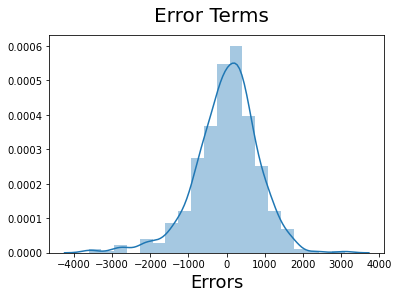

In [148]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [149]:
X_test_cons = X_test[col]
X_test_cons = sm.add_constant(X_test_cons)
X_test_cons.head()

,const,temp,season_Summer,season_Winter,yr_Year_19,mnth_9,holiday_1,weathersit_Cloudy,weathersit_Light_rain_snow
184,1.0,1.305371,0,0,0,0,1,1,0
535,1.0,1.613721,1,0,1,0,0,0,0
299,1.0,-0.112129,0,1,0,0,0,1,0
221,1.0,1.526280,0,0,0,0,0,0,0
152,1.0,1.240938,1,0,0,0,0,0,0


In [150]:
y_test_pred = lr.predict(X_test_cons)

Text(0.5, 0, 'Errors')

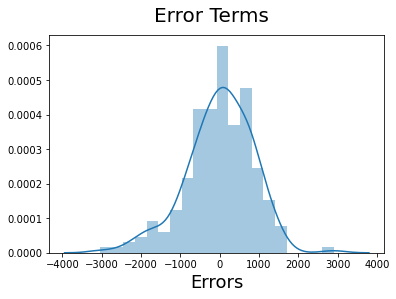

In [151]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Text(0, 0.5, 'y_pred')

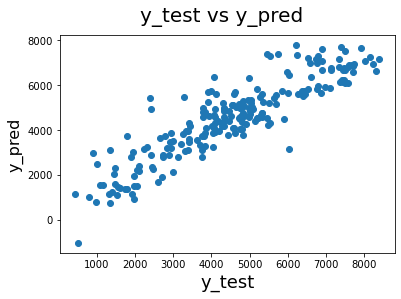

In [152]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# Final result 
# Rsquare on test data

In [153]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.7985648542341641